In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
tf.__version__

'2.3.1'

## Data Processing & Data Augmentation

In [2]:
train_data = pd.read_csv('data/training.csv', low_memory = False)
test_data = pd.read_csv('data/test.csv', low_memory = False)

In [3]:
train_data.head(2)

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  

[2 rows x 31 columns]

In [4]:
test_data.head(2)

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [7]:
import copy
dataset = copy.copy(train_data)

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [10]:
dataset['Image'] = dataset['Image'].apply(lambda x:(np.fromstring(x, dtype = int, sep = ' ')).reshape(96, 96))

In [11]:
dataset.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [12]:
dataset.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

In [13]:
test_data['Image'] = test_data['Image'].apply(lambda x: (np.fromstring(x, dtype = int, sep = ' ')).reshape(96, 96))

In [14]:
type(dataset['Image'])

pandas.core.series.Series

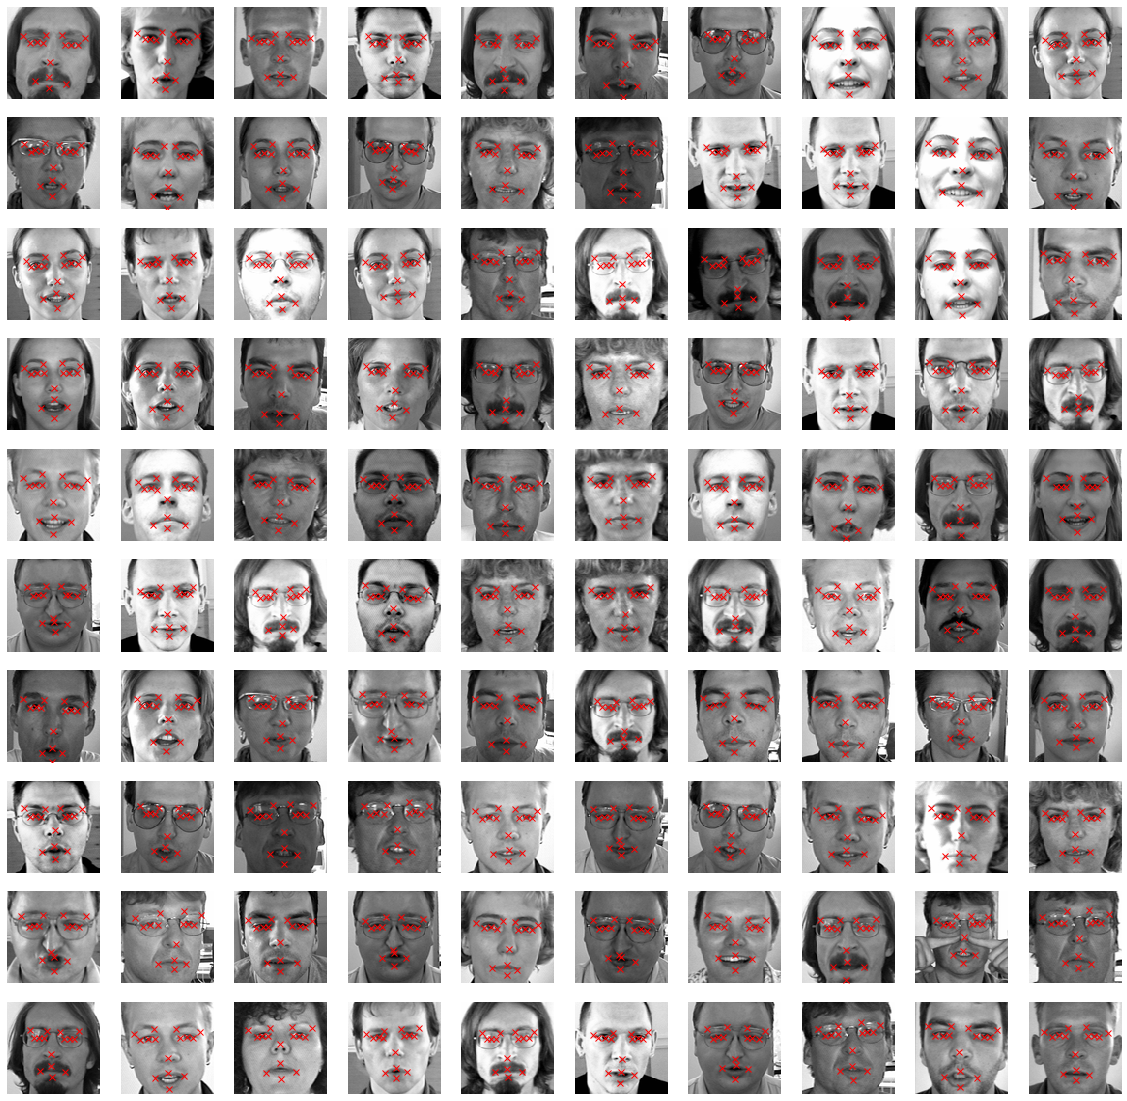

In [15]:
w_grid = 10
l_grid = 10
fig, axes = plt.subplots(w_grid, l_grid, figsize = (20, 20))
axes = axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(dataset['Image'][i], cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(dataset.loc[i][k-1], dataset.loc[i][k], 'rx')
    axes[i].axis('off')

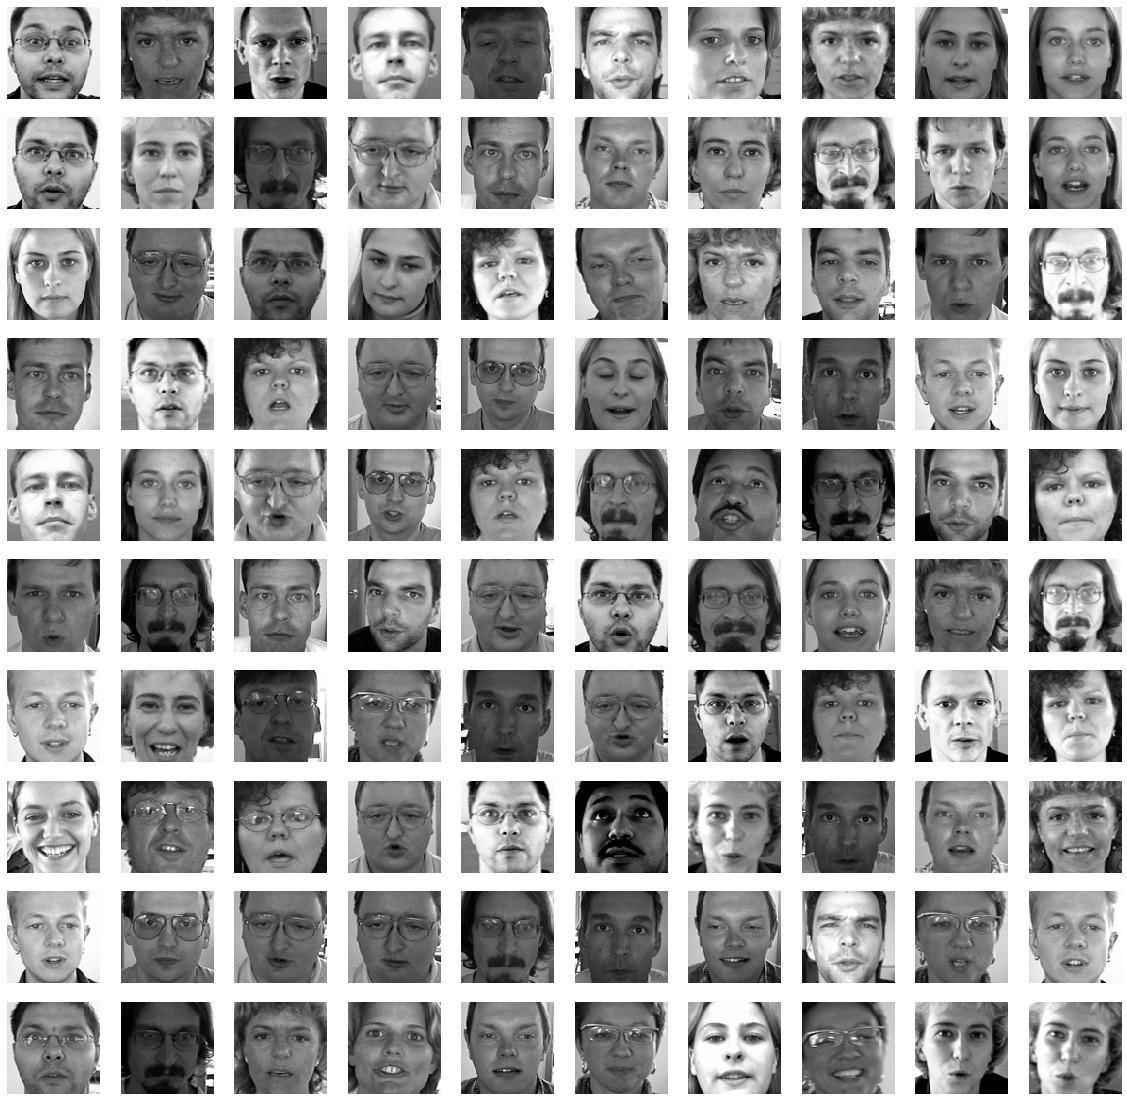

In [16]:
w_grid = 10
l_grid = 10
fig, axes = plt.subplots(w_grid, l_grid, figsize = (20, 20))
axes = axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(test_data['Image'][i], cmap = 'gray')
    axes[i].axis('off')

In [17]:
dataset_h_flip = copy.copy(dataset)
column = dataset_h_flip.columns[:-1]
column

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [18]:
dataset_h_flip['Image'] = dataset_h_flip['Image'].apply(lambda x: (np.flip(x, axis = 1)))

In [19]:
for i in range(len(column)):
    if(i%2 == 0):
        dataset_h_flip[column[i]] = dataset_h_flip[column[i]].apply(lambda x:(96. - float(x)))

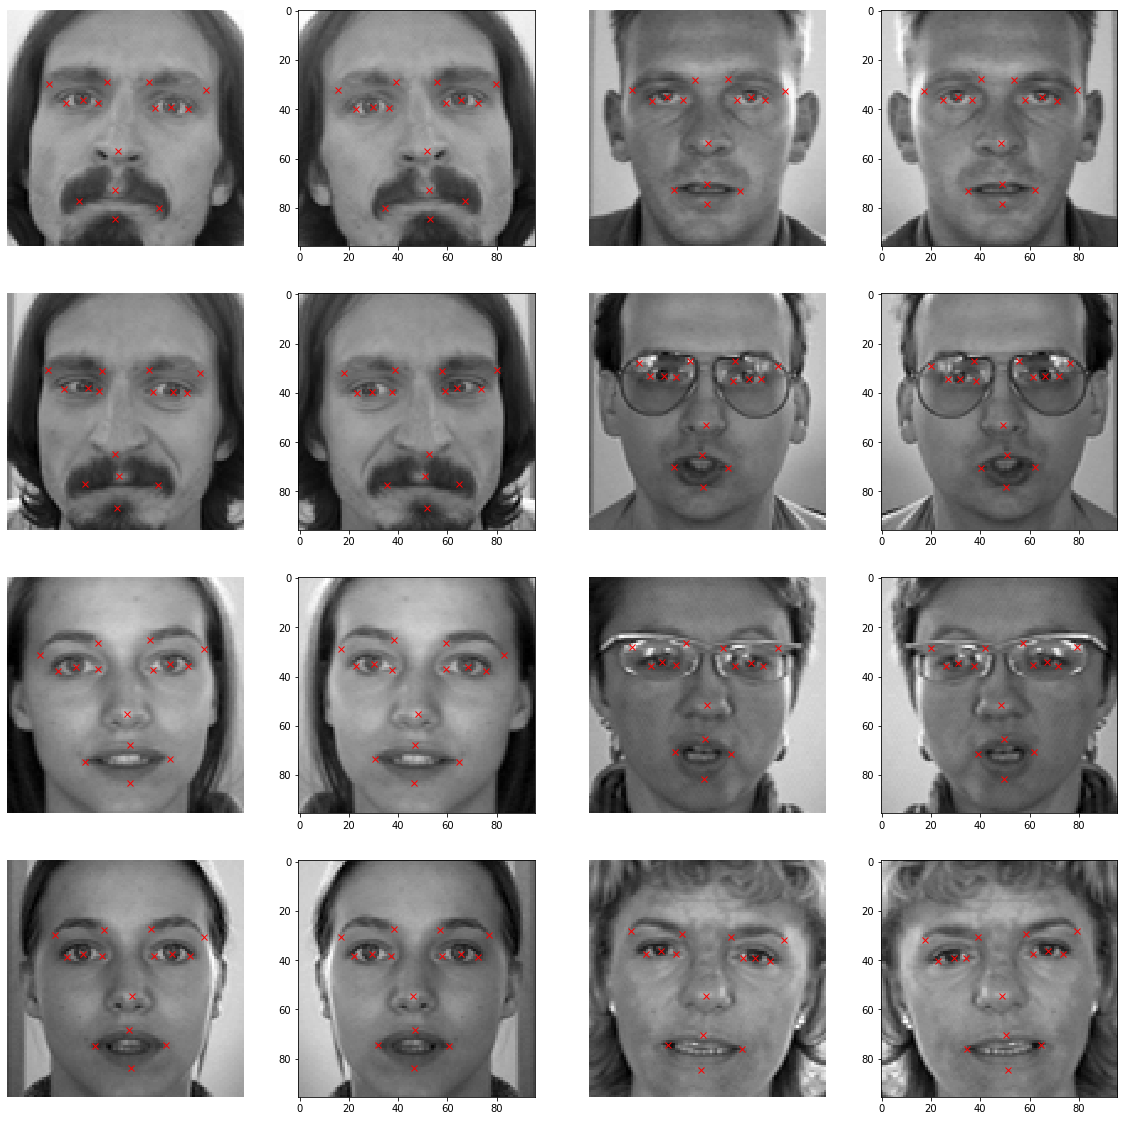

In [20]:
w_grid = 4
l_grid = 4
fig, axes = plt.subplots(w_grid, l_grid, figsize = (20, 20))
axes = axes.ravel()
for i in range(0, len(axes), 2):
    axes[i].imshow(dataset['Image'][i], cmap = 'gray')
    axes[i+1].imshow(dataset_h_flip['Image'][i], cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(dataset.loc[i][k-1], dataset.loc[i][k], 'rx')
        axes[i+1].plot(dataset_h_flip.loc[i][k-1], dataset_h_flip.loc[i][k], 'rx')

    axes[i].axis('off')

In [21]:
dataset_v_flip = copy.copy(dataset)
column = dataset_v_flip.columns[:-1]

In [22]:
dataset_v_flip['Image'] = dataset_v_flip['Image'].apply(lambda x: (np.flip(x, axis = 0)))

In [23]:
for i in range(len(column)):
    if(i%2 == 1):
        dataset_v_flip[column[i]] = dataset_v_flip[column[i]].apply(lambda x: (96.0 - float(x)))

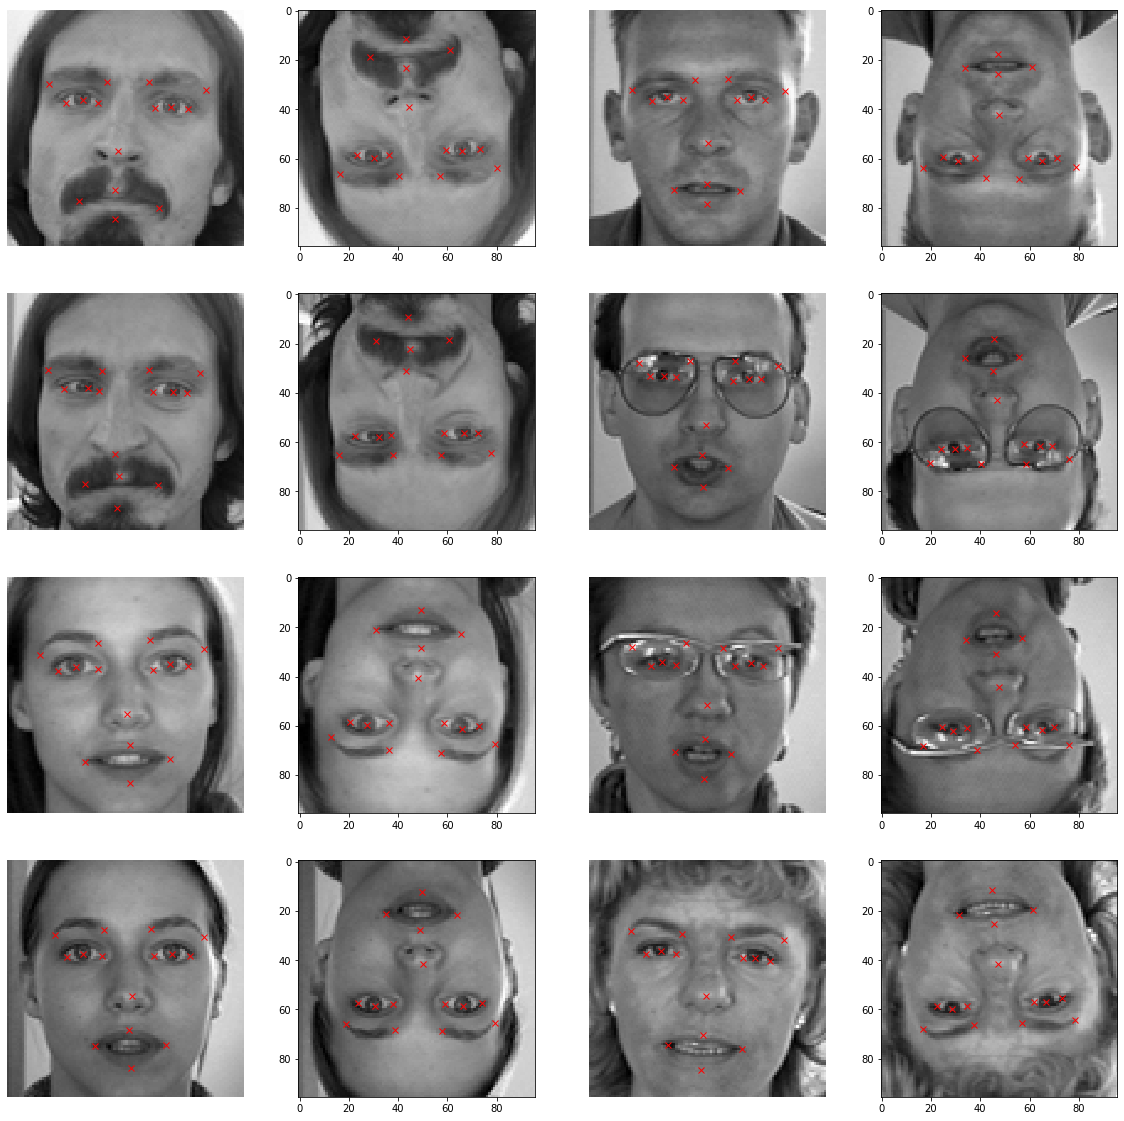

In [24]:
w_grid = 4
l_grid = 4
fig, axes = plt.subplots(w_grid, l_grid, figsize = (20, 20))
axes = axes.ravel()
for i in range(0, len(axes), 2):
    axes[i].imshow(dataset['Image'][i], cmap = 'gray')
    axes[i+1].imshow(dataset_v_flip['Image'][i], cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(dataset.loc[i][k-1], dataset.loc[i][k], 'rx')
        axes[i+1].plot(dataset_v_flip.loc[i][k-1], dataset_v_flip.loc[i][k], 'rx')

    axes[i].axis('off')

In [25]:
import random

In [26]:
dataset_light = copy.copy(dataset)
dataset_light['Image'] = dataset_light['Image'].apply(lambda x: (np.clip(random.uniform(1.5, 2)*x, 0.0, 255.0)))

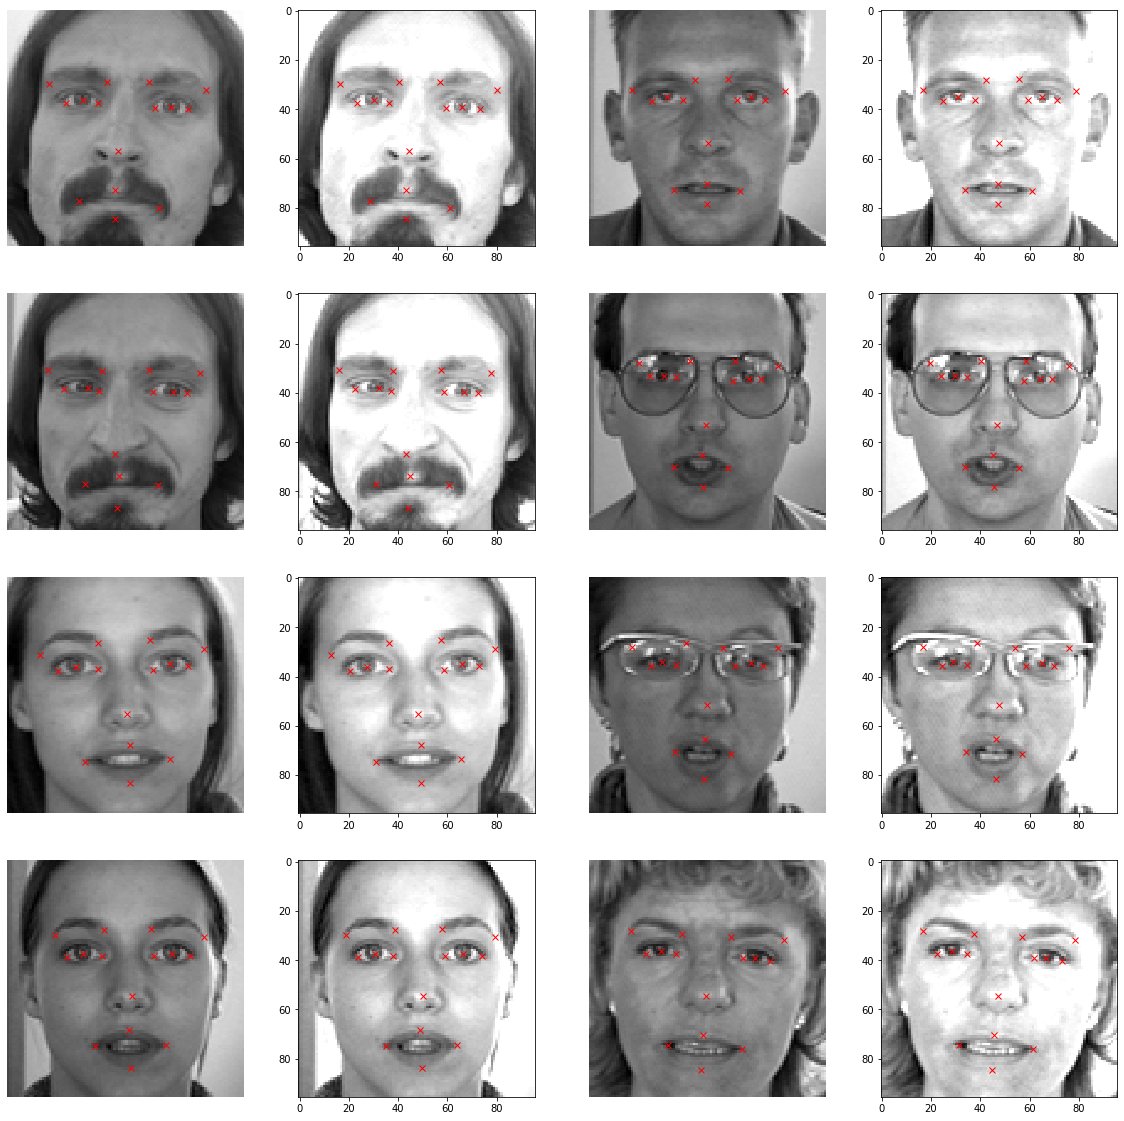

In [27]:
w_grid = 4
l_grid = 4
fig, axes = plt.subplots(w_grid, l_grid, figsize = (20, 20))
axes = axes.ravel()
for i in range(0, len(axes), 2):
    axes[i].imshow(dataset['Image'][i], cmap = 'gray')
    axes[i+1].imshow(dataset_light['Image'][i], cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(dataset.loc[i][k-1], dataset.loc[i][k], 'rx')
        axes[i+1].plot(dataset_light.loc[i][k-1], dataset_light.loc[i][k], 'rx')

    axes[i].axis('off')

In [28]:
dataset_light_v = copy.copy(dataset_v_flip)
dataset_light_v['Image'] = dataset_light_v['Image'].apply(lambda x: (np.clip(random.uniform(1.5, 2)*x, 0.0, 255.0)))

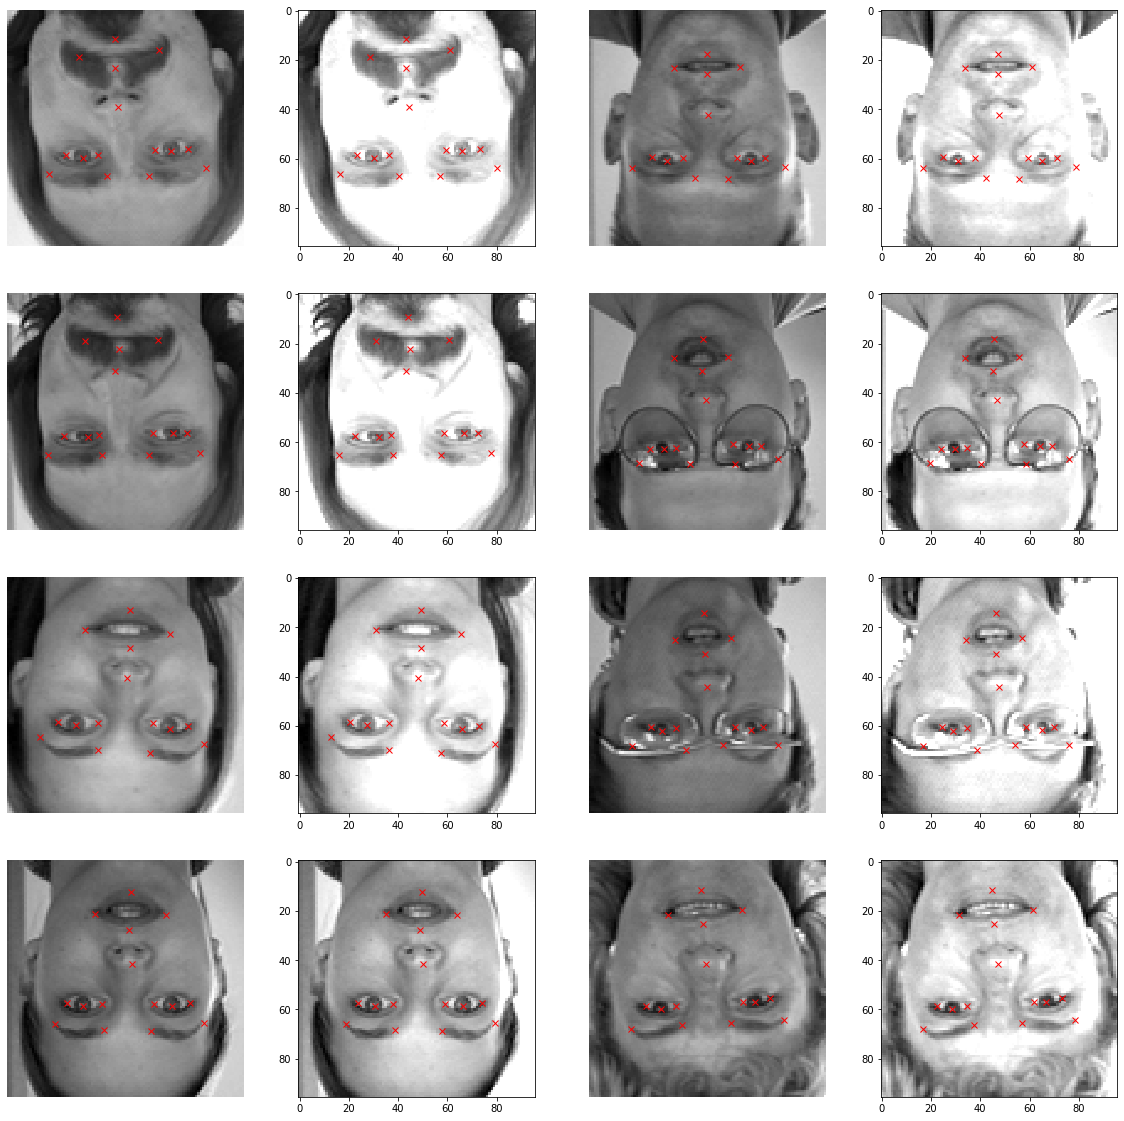

In [29]:
w_grid = 4
l_grid = 4
fig, axes = plt.subplots(w_grid, l_grid, figsize = (20, 20))
axes = axes.ravel()
for i in range(0, len(axes), 2):
    axes[i].imshow(dataset_v_flip['Image'][i], cmap = 'gray')
    axes[i+1].imshow(dataset_light_v['Image'][i], cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(dataset_v_flip.loc[i][k-1], dataset_v_flip.loc[i][k], 'rx')
        axes[i+1].plot(dataset_light_v.loc[i][k-1], dataset_light_v.loc[i][k], 'rx')

    axes[i].axis('off')

In [30]:
dataset_array = dataset.iloc[:, :].values
dataset_h_flip_array = dataset_h_flip.iloc[:, :].values
dataset_v_flip_array = dataset_v_flip.iloc[:, :].values
dataset_light_array = dataset_light.iloc[:, :].values
dataset_light_v_array = dataset_light_v.iloc[:, :].values

In [31]:
argumented_dataset = np.concatenate((dataset_array, dataset_h_flip_array, dataset_v_flip_array, dataset_light_array),
                                    axis = 0)

In [32]:
argumented_dataset.shape

(8560, 31)

In [33]:
y = argumented_dataset[:, :-1]
img = argumented_dataset[:, -1]

In [34]:
img = img/255.0
x = np.empty((len(img), 96, 96, 1))
for i in range(len(img)):
    x[i,] = np.expand_dims(img[i], axis = 2)
x = np.asarray(x).astype(np.float32)
x.shape

(8560, 96, 96, 1)

In [35]:
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [37]:
x_valid, x_test1, y_valid, y_test1 = train_test_split(x_valid, y_valid, test_size = 0.5, random_state = 0)

In [38]:
test_data.head(5)

ImageId                                              Image
0        1  [[182, 183, 182, 182, 180, 180, 176, 169, 156,...
1        2  [[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ...
2        3  [[177, 176, 174, 170, 169, 169, 168, 166, 166,...
3        4  [[176, 174, 174, 175, 174, 174, 176, 176, 175,...
4        5  [[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ...

In [39]:
test = test_data.iloc[:, 1].values
test.shape

(1783,)

In [40]:
test = test/255.0
x_test = np.empty((len(test), 96, 96, 1))
for i in range(len(test)):
    x_test[i,] = np.expand_dims(test[i], axis = 2)
x_test = np.asarray(x_test).astype(np.float32)
x_test.shape

(1783, 96, 96, 1)

In [41]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test1.shape, y_test1.shape, x_test.shape

((6848, 96, 96, 1),
 (6848, 30),
 (856, 96, 96, 1),
 (856, 30),
 (856, 96, 96, 1),
 (856, 30),
 (1783, 96, 96, 1))

## Network Building

In [86]:
def res_block(X, filter, stage):
    # CONVOLUTIONAL BLOCK
    X_copy = X
    f1, f2, f3 = filter
    #main path
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = (1, 1), strides = (1, 1), name = 'res_'+str(stage)+'_conv_a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.MaxPool2D(pool_size = (2, 2))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = (3, 3), strides = (1, 1), name = 'res_'+str(stage)+'_conv_b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = (1, 1), strides = (1, 1), name = 'res_'+str(stage)+'_conv_c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_c')(X)
    
    #short path
    X_copy = tf.keras.layers.Conv2D(filters = f3, kernel_size=(1, 1), strides = (1, 1), name = 'res_'+str(stage)+'_conv_copy', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X_copy)
    X_copy = tf.keras.layers.MaxPool2D(pool_size = (2, 2))(X_copy)
    X_copy = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)
    
    #ADD
    X = tf.keras.layers.Add()([X, X_copy])
    X = tf.keras.layers.Activation('relu')(X)
    
    #IDENTITY BLOCK1
    #main path
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = (1, 1), strides = (1, 1),name ='res_'+str(stage)+'_identity_1_a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = (3, 3), strides = (1, 1),name ='res_'+str(stage)+'_identity_1_b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = (1, 1), strides = (1, 1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_identity_1_c')(X)
    
    #ADD
    X = tf.keras.layers.Add()([X, X_copy])
    X = tf.keras.layers.Activation('relu')(X)
    
    #IDENTITY BLOCK2
    
    X_copy = X
    
    #main path
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = (1, 1), strides = (1, 1),name ='res_'+str(stage)+'_identity_2_a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = (3, 3), strides = (1, 1),name ='res_'+str(stage)+'_identity_2_b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = (1, 1), strides = (1, 1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_identity_2_c')(X)
    
    #ADD
    X = tf.keras.layers.Add()([X, X_copy])
    X = tf.keras.layers.Activation('relu')(X)
    
    return(X)

In [87]:
input_shape = (96, 96, 1)
X_input = tf.keras.Input(input_shape)
X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)

#stage1
X = tf.keras.layers.Conv2D(filters = 64, kernel_size = (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0))(X)
X = tf.keras.layers.BatchNormalization(axis = 3, name = 'conv1_bn1')(X)
X = tf.keras.layers.Activation('relu')(X)
X = tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2))(X)

#stage2
X = res_block(X, filter = [64, 64, 256], stage = 2)

#stage3
X = res_block(X, filter = [128, 128, 512], stage = 3)

#avarage pooloing
X = tf.keras.layers.AveragePooling2D(pool_size = (2, 2), name = 'avarage_pooling')(X)
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(units = 4096, activation = 'relu')(X)
X = tf.keras.layers.Dropout(0.25)(X)
X = tf.keras.layers.Dense(units = 2048, activation = 'relu')(X)
X = tf.keras.layers.Dropout(0.15)(X)
X = tf.keras.layers.Dense(units = 30, activation = 'relu')(X)

classifier = tf.keras.models.Model(inputs = X_input, outputs = X)
classifier.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1_bn1 (BatchNormalization)  (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [88]:
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'mean_squared_error',
                   metrics = ['accuracy'])

earlystop = EarlyStopping(monitor = 'val_loss', patience = 8, mode = 'min', verbose = 1, restore_best_weights = True,
                             min_delta = 0.0001)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 8, mode = 'min', verbose = 1,
                              min_delta = 0.0001)

In [89]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath = 'model/facial_key_points_detection.h5', monitor = 'val_loss', verbose = 1,
                             save_best_only = True, mode = 'min')

callback = [checkpoint]

In [90]:
epochs_history = classifier.fit(x = x_train, y = y_train, epochs = 50, validation_data = (x_valid, y_valid),
                                callbacks = callback)

Epoch 1/50
214/214 [==============================] - ETA: 0s - loss: 371.5164 - accuracy: 0.3785
Epoch 00001: val_loss improved from inf to 881.98895, saving model to model\facial_key_points_detection.h5
214/214 [==============================] - 179s 836ms/step - loss: 371.5164 - accuracy: 0.3785 - val_loss: 881.9890 - val_accuracy: 0.3645
Epoch 2/50
214/214 [==============================] - ETA: 0s - loss: 89.2666 - accuracy: 0.6495
Epoch 00002: val_loss improved from 881.98895 to 290.47659, saving model to model\facial_key_points_detection.h5
214/214 [==============================] - 178s 831ms/step - loss: 89.2666 - accuracy: 0.6495 - val_loss: 290.4766 - val_accuracy: 0.5023
Epoch 3/50
214/214 [==============================] - ETA: 0s - loss: 57.3864 - accuracy: 0.6503
Epoch 00003: val_loss improved from 290.47659 to 85.68104, saving model to model\facial_key_points_detection.h5
214/214 [==============================] - 176s 823ms/step - loss: 57.3864 - accuracy: 0.6503 - val

Epoch 28/50
214/214 [==============================] - ETA: 0s - loss: 11.7005 - accuracy: 0.7779
Epoch 00028: val_loss did not improve from 44.71258
214/214 [==============================] - 143s 667ms/step - loss: 11.7005 - accuracy: 0.7779 - val_loss: 52.0738 - val_accuracy: 0.7734
Epoch 29/50
214/214 [==============================] - ETA: 0s - loss: 11.0057 - accuracy: 0.7722
Epoch 00029: val_loss did not improve from 44.71258
214/214 [==============================] - 143s 669ms/step - loss: 11.0057 - accuracy: 0.7722 - val_loss: 57.2464 - val_accuracy: 0.7582
Epoch 30/50
214/214 [==============================] - ETA: 0s - loss: 11.1211 - accuracy: 0.7817
Epoch 00030: val_loss did not improve from 44.71258
214/214 [==============================] - 143s 666ms/step - loss: 11.1211 - accuracy: 0.7817 - val_loss: 52.0582 - val_accuracy: 0.7780
Epoch 31/50
214/214 [==============================] - ETA: 0s - loss: 12.8051 - accuracy: 0.7707
Epoch 00031: val_loss improved from 44.71

In [91]:
classifier.evaluate(x_test1, y_test1)

27/27 [==============================] - 4s 134ms/step - loss: 37.7473 - accuracy: 0.8014


[37.747310638427734, 0.8014018535614014]

In [92]:
y_pred1 = classifier.predict(x_test1)

## Visualize Model Accuracy

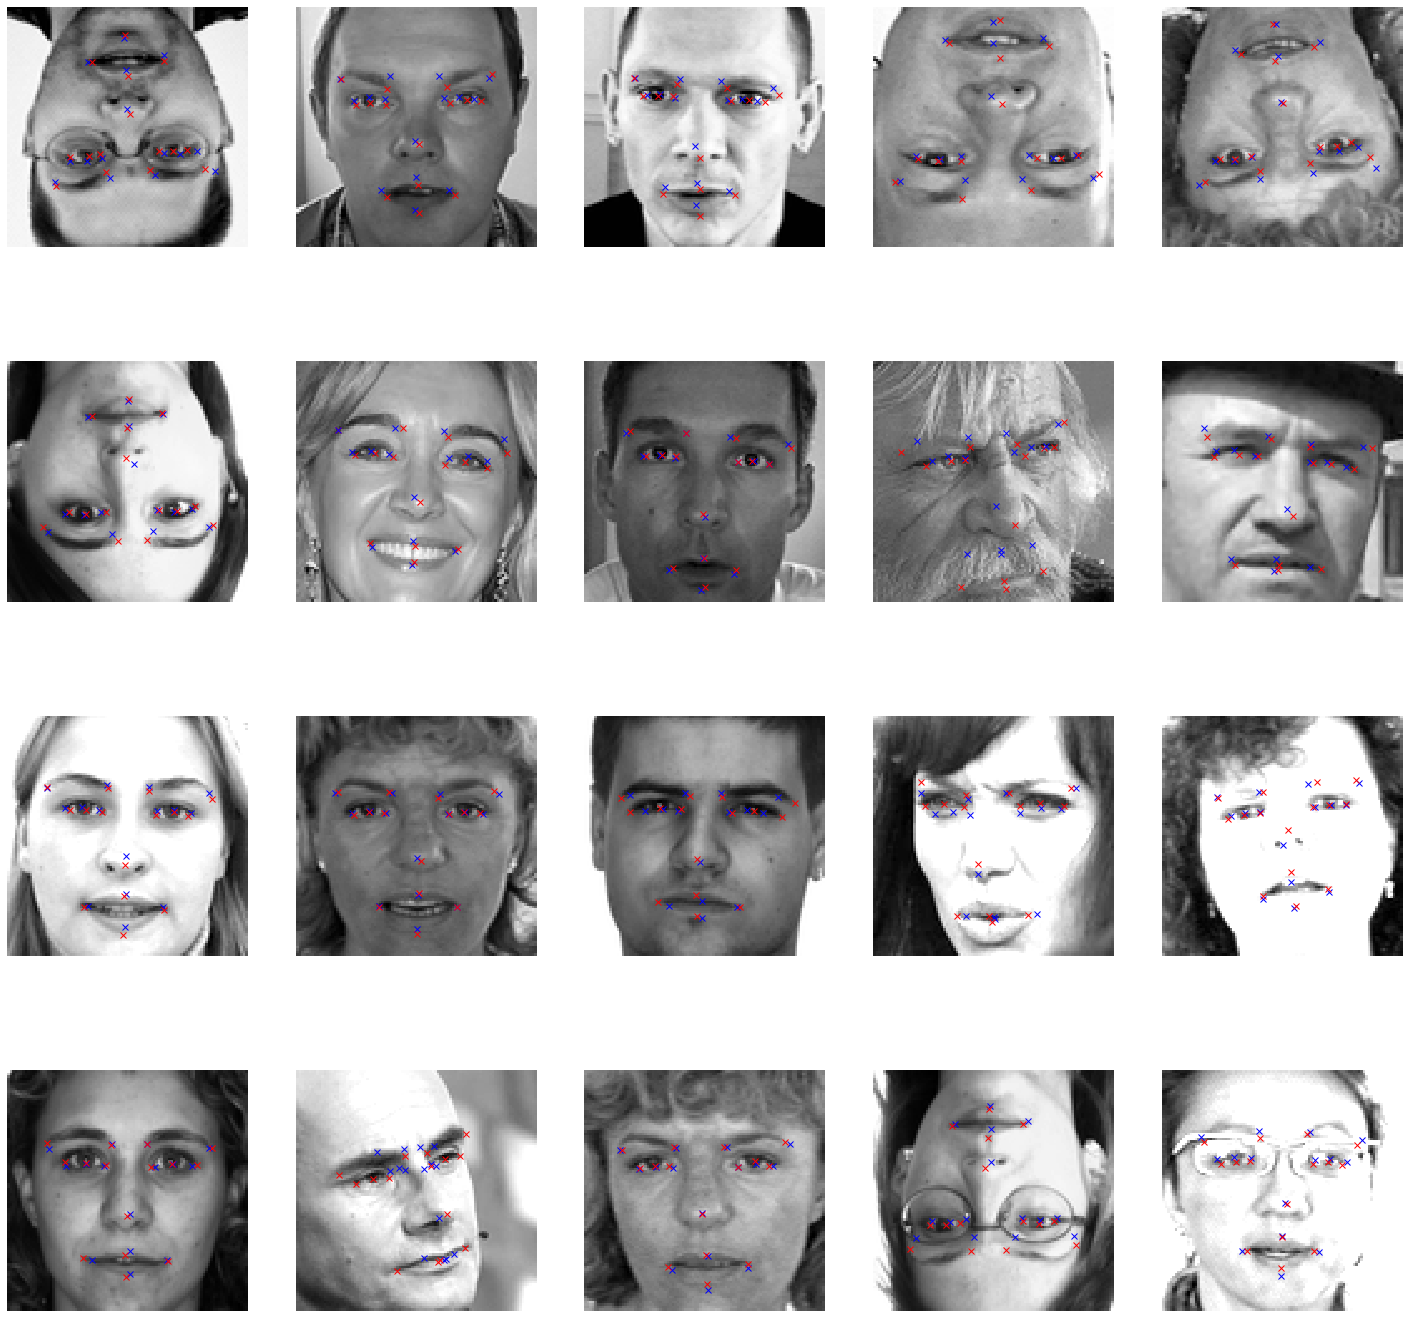

In [93]:
w_grid = 4
l_grid = 5
fig, axes = plt.subplots(w_grid, l_grid, figsize = (25, 25))
axes = axes.ravel()
for i in range(0, len(axes), 1):
    axes[i].imshow(x_test1[i].reshape(96, 96), cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(y_pred1[i][k-1], y_pred1[i][k], 'bx')
        axes[i].plot(y_test1[i][k-1], y_test1[i][k], 'rx')
    axes[i].axis('off')

In [94]:
y_pred = classifier.predict(x_test)

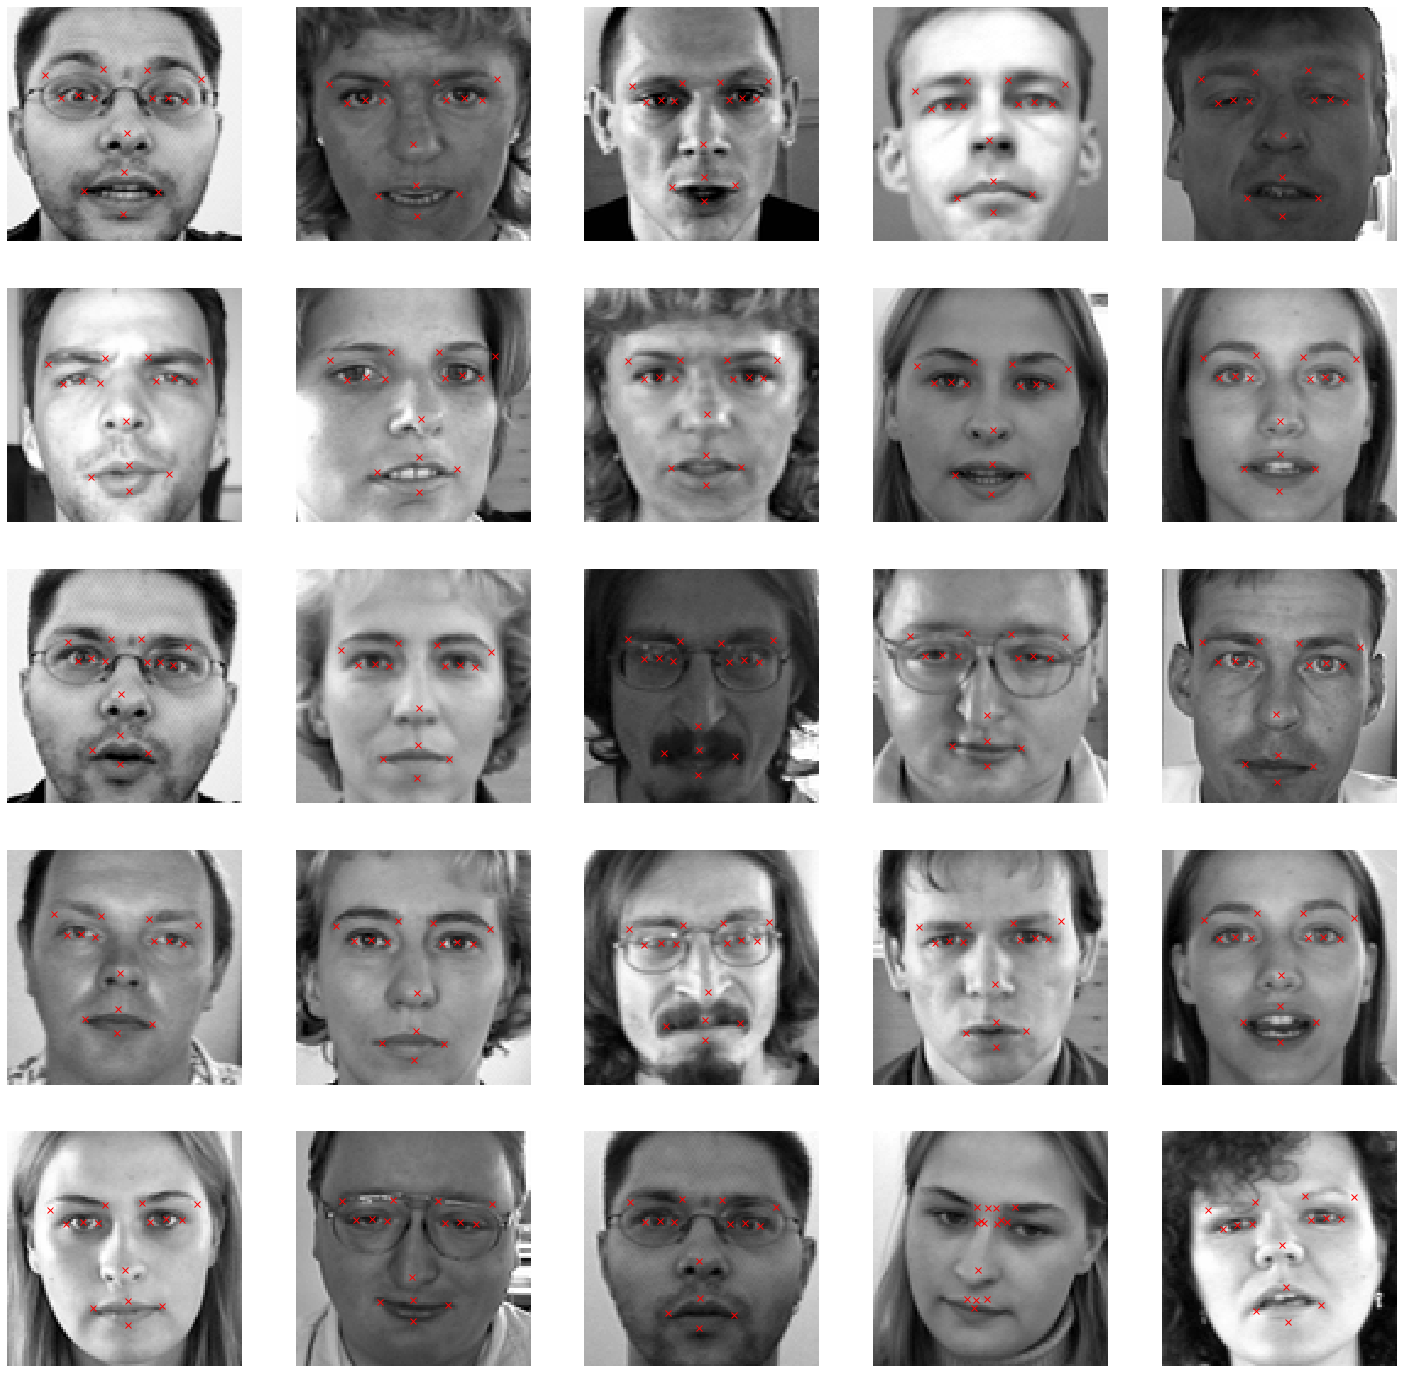

In [99]:
w_grid = 5
l_grid = 5
fig, axes = plt.subplots(w_grid, l_grid, figsize = (25, 25))
axes = axes.ravel()
for i in range(0, len(axes), 1):
    axes[i].imshow(x_test[i].reshape(96, 96), cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(y_pred[i][k-1], y_pred[i][k], 'rx')
    axes[i].axis('off')

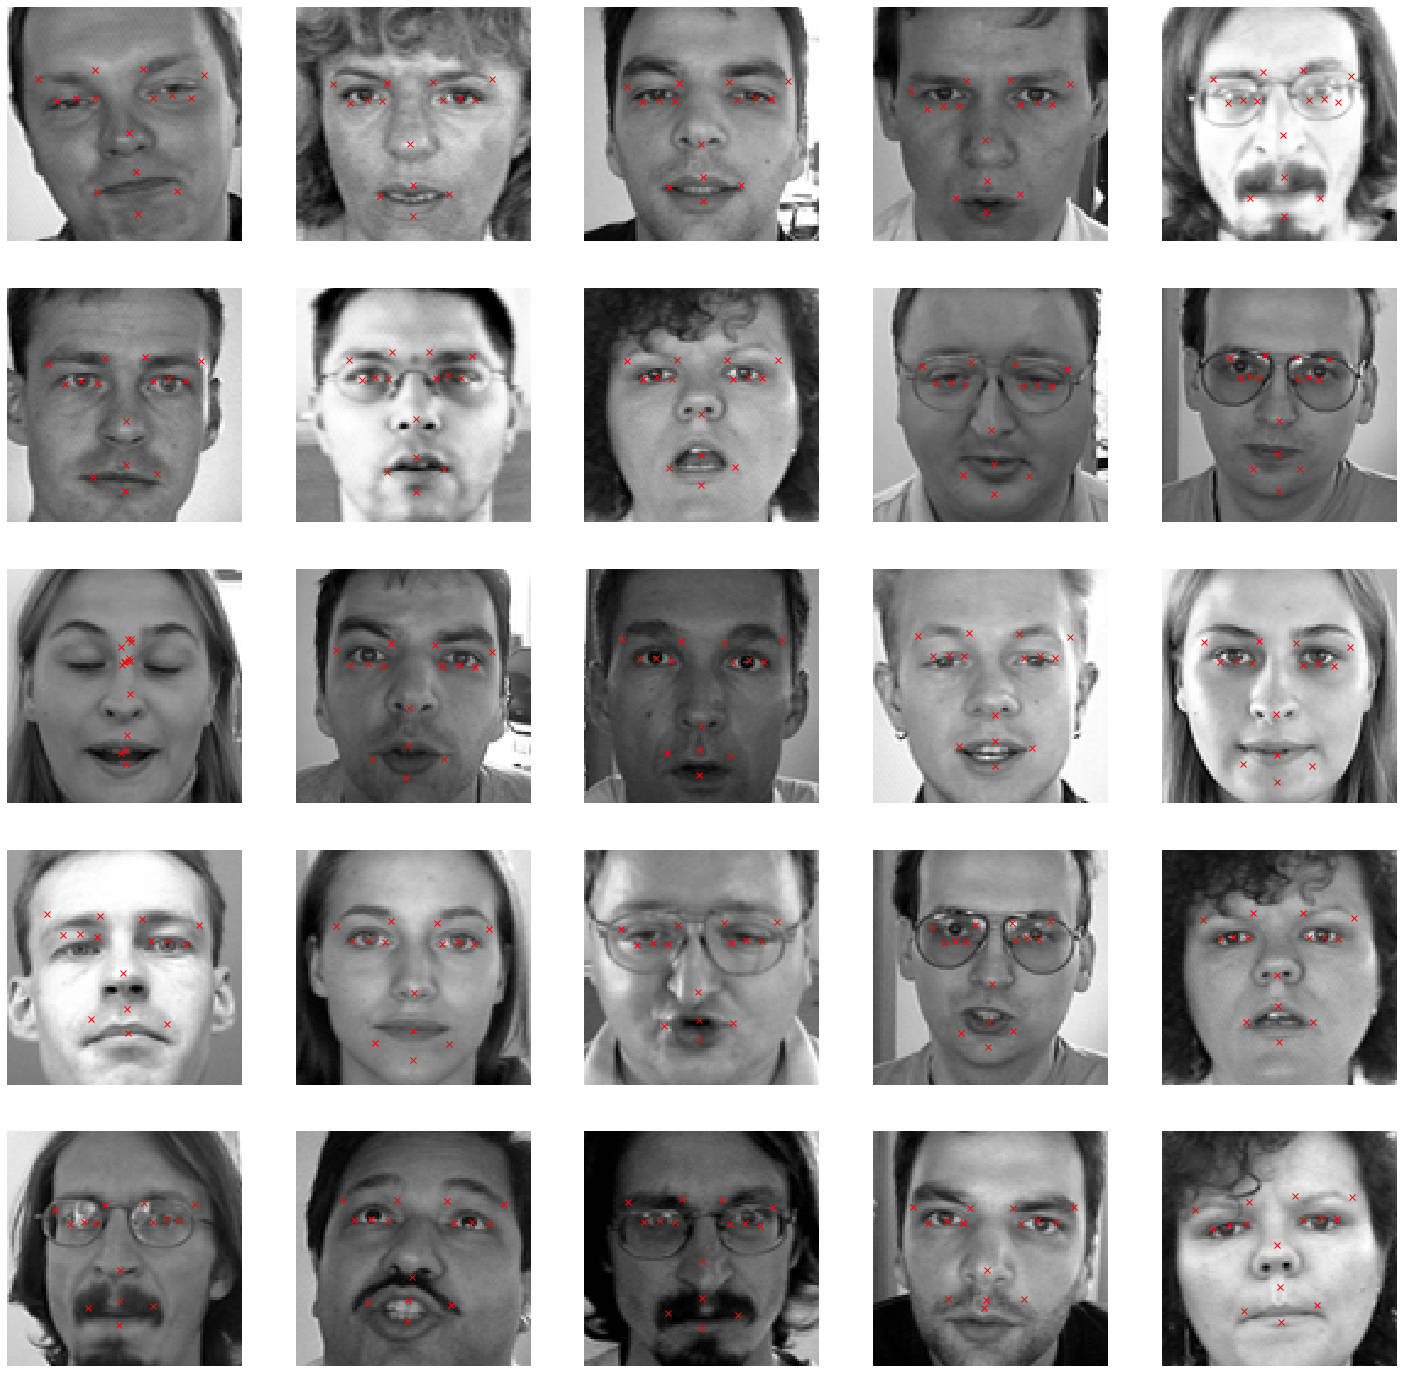

In [100]:
w_grid = 5
l_grid = 5
fig, axes = plt.subplots(w_grid, l_grid, figsize = (25, 25))
axes = axes.ravel()
for i in range(0, len(axes), 1):
    axes[i].imshow(x_test[25+i].reshape(96, 96), cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(y_pred[25+i][k-1], y_pred[i][k], 'rx')
    axes[i].axis('off')

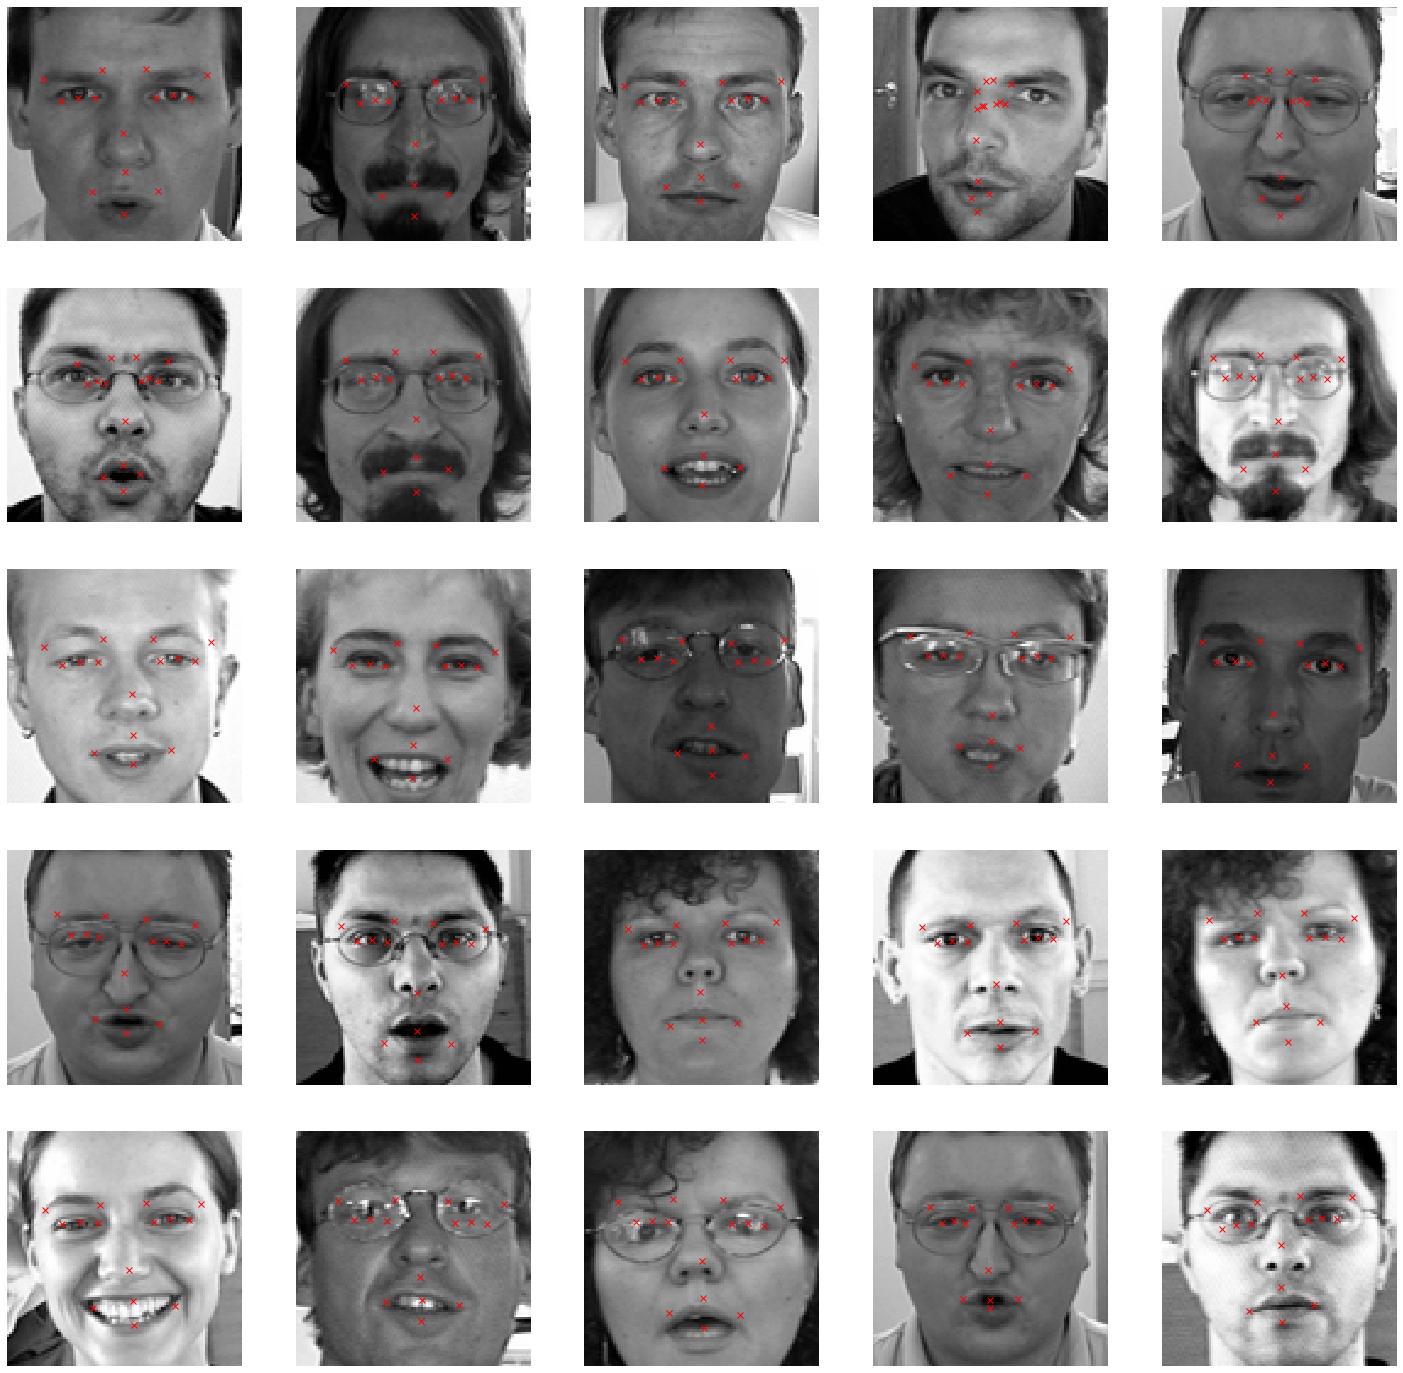

In [101]:
w_grid = 5
l_grid = 5
fig, axes = plt.subplots(w_grid, l_grid, figsize = (25, 25))
axes = axes.ravel()
for i in range(0, len(axes), 1):
    axes[i].imshow(x_test[50+i].reshape(96, 96), cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(y_pred[50+i][k-1], y_pred[i][k], 'rx')
    axes[i].axis('off')